In [1]:
from selenium import webdriver
import time
import pandas as pd
from tqdm import trange
import random

## Scraping

In [30]:
maxpage = 100
opt = webdriver.ChromeOptions()
opt.add_experimental_option("excludeSwitches", ["enable-automation"])
opt.add_experimental_option('useAutomationExtension', False)
#opt.add_argument('--headless')
driver = webdriver.Chrome(options=opt)
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": "Object.defineProperty(navigator, 'webdriver', {get: () => undefined})"
})

{'identifier': '2'}

In [31]:
driver.get('https://s.taobao.com/search?q=%E6%9D%AF%E5%9E%AB&imgfile=&js=1&stats_click=search_radio_all%3A1&initiative_id=staobaoz_20210624&ie=utf8')

In [32]:
Taobao=pd.DataFrame({'商品名':[],'店铺名':[],'店铺位置':[],'销量':[],'价格':[]})

In [35]:
for j in trange(maxpage):    
    goods= driver.find_elements_by_xpath('//*[@id="mainsrp-itemlist"]/div/div/div/*/div[2]/div[2]')
    shops= driver.find_elements_by_xpath('//*[@id="mainsrp-itemlist"]/div/div/div[1]/*/div[2]/div[3]/div[1]/a')
    locations=driver.find_elements_by_xpath('//*[@id="mainsrp-itemlist"]/div/div/div[1]/*/div[2]/div[3]/div[2]')
    sales=driver.find_elements_by_xpath('//*[@id="mainsrp-itemlist"]/div/div/div[1]/*/div[2]/div[1]/div[2]')
    price=driver.find_elements_by_xpath('//*[@id="mainsrp-itemlist"]/div/div/div[1]/*/div[2]/div[1]/div[1]/strong')
    for i in range(len(goods)):
        temp=pd.DataFrame({'商品名':[goods[i].text.strip()],'店铺名':[shops[i].text.strip()],'店铺位置':[locations[i].text.strip()],'销量':[sales[i].text.strip()],'价格':[price[i].text.strip()]})
        Taobao=Taobao.append(temp)
    a = driver.find_element_by_link_text('下一页')
    a.click()
    sleeptime=random.randint(3, 8)
    time.sleep(sleeptime)

 99%|█████████▉| 99/100 [18:00<00:10, 10.92s/it]


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"下一页"}
  (Session info: chrome=91.0.4472.114)


In [36]:
Taobao.to_csv('杯垫.csv',encoding='utf-8_sig')

## Other data

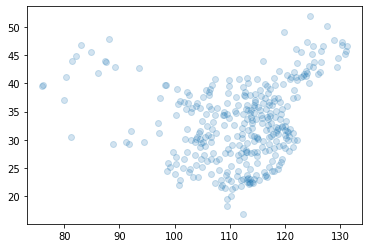

In [41]:
import requests, re, pandas as pd, matplotlib.pyplot as mp
url = 'https://blog.csdn.net/Yellow_python/article/details/88823956'
header = {'User-Agent': 'Opera/8.0 (Windows NT 5.1; U; en)'}
r = requests.get(url, headers=header)
contain = re.findall('<pre><code>([\s\S]+?)</code></pre>', r.text)[0].strip()
df = pd.DataFrame([i.split(',') for i in contain.split('\n')],
                  columns=['province', 'city', 'longitude', 'latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])
df['latitude'] = pd.to_numeric(df['latitude'])
mp.scatter(df['longitude'], df['latitude'], alpha=0.2)
mp.show()
df.to_csv('中国省市经纬度.csv', index=None)

## Data Analysis

In [263]:
pc=pd.read_csv('生鲜.csv')

In [264]:
pc=pc.drop_duplicates(subset='商品名', keep='first', inplace=False)

In [265]:
pc

,Unnamed: 0,商品名,店铺名,店铺位置,销量,价格
0,0,澳嘉澳洲进口安格斯谷饲新鲜菲力雪花牛排原切儿童辅食套餐2斤,澳嘉旗舰店,上海,163人付款,389.00
1,0,羊肉新鲜10斤冷冻整只半只宁夏盐池滩烧烤羊排羊腿羊蝎子现杀全羊,羊秀生鲜旗舰店,宁夏 银川,3人付款,558.00
2,0,滩羊肉 盐池 宁夏10斤半只羊礼盒羊肉新鲜现杀盐池滩羊排新鲜羊腿,以鲜冠生鲜旗舰店,NaN,21人付款,528.00
3,0,10斤原切牛腩新鲜冷冻商用整块牛肉雪花健身生鲜非半成品红烧熟食,牛膳牧场旗舰店,山东 济宁,1709人付款,229.00
4,0,原切牛排新鲜肉眼黑椒牛肉10片澳洲非安格斯牛扒生鲜非腌制20包装,聚缘德旗舰店,广东 佛山,1398人付款,238.00
...,...,...,...,...,...,...
2430,0,鲜活乳山生蚝5斤特大牡蛎正宗现捕现发带壳海鲜水产10非湛江整箱,退伍兵小哥,山东 威海,0人付款,34.90
2603,0,大希地开心就好牛排130g12片玉米粒刀叉套餐团购黑椒牛肉牛扒,永多食品专营店,浙江 杭州,1人付款,118.00
2694,0,特大号正宗乳山生蚝鲜活新鲜牡蛎带壳 海鲜水产海蛎子包邮10斤5XL,湾湾湾零食铺,山东 威海,0人付款,176.72
2782,0,生蚝鲜活10斤乳山生蚝带壳海蛎子一箱牡蛎海鲜水产贝壳包邮湛江元,退伍兵小哥,山东 青岛,0人付款,31.76


In [266]:
for i in pc.index:
    if pc['店铺位置'].notna()[i]==0:
        pc=pc.drop(i)

In [267]:
pc

,Unnamed: 0,商品名,店铺名,店铺位置,销量,价格
0,0,澳嘉澳洲进口安格斯谷饲新鲜菲力雪花牛排原切儿童辅食套餐2斤,澳嘉旗舰店,上海,163人付款,389.00
1,0,羊肉新鲜10斤冷冻整只半只宁夏盐池滩烧烤羊排羊腿羊蝎子现杀全羊,羊秀生鲜旗舰店,宁夏 银川,3人付款,558.00
3,0,10斤原切牛腩新鲜冷冻商用整块牛肉雪花健身生鲜非半成品红烧熟食,牛膳牧场旗舰店,山东 济宁,1709人付款,229.00
4,0,原切牛排新鲜肉眼黑椒牛肉10片澳洲非安格斯牛扒生鲜非腌制20包装,聚缘德旗舰店,广东 佛山,1398人付款,238.00
5,0,正大整切儿童牛排西冷眼肉新鲜牛扒非原切生鲜食品10份脂家庭套餐,正大食品旗舰店,北京,2035人付款,178.90
...,...,...,...,...,...,...
2430,0,鲜活乳山生蚝5斤特大牡蛎正宗现捕现发带壳海鲜水产10非湛江整箱,退伍兵小哥,山东 威海,0人付款,34.90
2603,0,大希地开心就好牛排130g12片玉米粒刀叉套餐团购黑椒牛肉牛扒,永多食品专营店,浙江 杭州,1人付款,118.00
2694,0,特大号正宗乳山生蚝鲜活新鲜牡蛎带壳 海鲜水产海蛎子包邮10斤5XL,湾湾湾零食铺,山东 威海,0人付款,176.72
2782,0,生蚝鲜活10斤乳山生蚝带壳海蛎子一箱牡蛎海鲜水产贝壳包邮湛江元,退伍兵小哥,山东 青岛,0人付款,31.76


In [268]:
#把pc中的数据复制到一个新的dataframe,命名为pc_sales
pc_sales=pc
for i in pc_sales.index:
    if pc_sales['销量'].notna()[i]==0:
        pc_sales=pc_sales.drop(i)

In [269]:
pc_sales

,Unnamed: 0,商品名,店铺名,店铺位置,销量,价格
0,0,澳嘉澳洲进口安格斯谷饲新鲜菲力雪花牛排原切儿童辅食套餐2斤,澳嘉旗舰店,上海,163人付款,389.00
1,0,羊肉新鲜10斤冷冻整只半只宁夏盐池滩烧烤羊排羊腿羊蝎子现杀全羊,羊秀生鲜旗舰店,宁夏 银川,3人付款,558.00
3,0,10斤原切牛腩新鲜冷冻商用整块牛肉雪花健身生鲜非半成品红烧熟食,牛膳牧场旗舰店,山东 济宁,1709人付款,229.00
4,0,原切牛排新鲜肉眼黑椒牛肉10片澳洲非安格斯牛扒生鲜非腌制20包装,聚缘德旗舰店,广东 佛山,1398人付款,238.00
5,0,正大整切儿童牛排西冷眼肉新鲜牛扒非原切生鲜食品10份脂家庭套餐,正大食品旗舰店,北京,2035人付款,178.90
...,...,...,...,...,...,...
2430,0,鲜活乳山生蚝5斤特大牡蛎正宗现捕现发带壳海鲜水产10非湛江整箱,退伍兵小哥,山东 威海,0人付款,34.90
2603,0,大希地开心就好牛排130g12片玉米粒刀叉套餐团购黑椒牛肉牛扒,永多食品专营店,浙江 杭州,1人付款,118.00
2694,0,特大号正宗乳山生蚝鲜活新鲜牡蛎带壳 海鲜水产海蛎子包邮10斤5XL,湾湾湾零食铺,山东 威海,0人付款,176.72
2782,0,生蚝鲜活10斤乳山生蚝带壳海蛎子一箱牡蛎海鲜水产贝壳包邮湛江元,退伍兵小哥,山东 青岛,0人付款,31.76


In [270]:
#创建一列将包含中文的销量转化成数字
pc_sales['销量数字']=0
for i in range(len(pc_sales)):
    if '万'in pc_sales.iloc[i,4]:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-5])*10000
    elif len(pc_sales.iloc[i,4])==8:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-4])
    else:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-3])

In [271]:
pc_stores=pc['店铺位置'].value_counts()
pc_stores

上海        282
江苏 南京     181
北京         86
山东 青岛      85
广东 深圳      82
         ... 
湖北 孝感       1
青海 海东       1
广东 汕头       1
湖南 怀化       1
黑龙江 大庆      1
Name: 店铺位置, Length: 131, dtype: int64

In [272]:
#创建一个dataframe存储每个城市的店铺数
pc_stores=pc['店铺位置'].value_counts()
df_pc_stores=pd.DataFrame({'城市':[],"店铺数":[]})
for i in range(len(pc_stores)):
    if len(pc_stores.index[i])>3:
        if '黑龙江' in pc_stores.index[i] or '内蒙古' in pc_stores.index[i]:
            df_pc_stores=df_pc_stores.append(pd.DataFrame({'城市':[pc_stores.index[i][4:]],"店铺数":[pc_stores[i]]}))
        else : 
            df_pc_stores=df_pc_stores.append(pd.DataFrame({'城市':[pc_stores.index[i][3:]],"店铺数":[pc_stores[i]]}))
    else:
        df_pc_stores=df_pc_stores.append(pd.DataFrame({'城市':[pc_stores.index[i]],"店铺数":[pc_stores[i]]}))                        

In [273]:
df_pc_stores

,城市,店铺数
0,上海,282.0
0,南京,181.0
0,北京,86.0
0,青岛,85.0
0,深圳,82.0
...,...,...
0,孝感,1.0
0,海东,1.0
0,汕头,1.0
0,怀化,1.0


In [274]:
#下面按城市把销量加总
df_pc_sales={}
df_pc_sales=pd.DataFrame({'城市':df_pc_stores['城市']})

In [275]:
pc_sales

,Unnamed: 0,商品名,店铺名,店铺位置,销量,价格,销量数字
0,0,澳嘉澳洲进口安格斯谷饲新鲜菲力雪花牛排原切儿童辅食套餐2斤,澳嘉旗舰店,上海,163人付款,389.00,163
1,0,羊肉新鲜10斤冷冻整只半只宁夏盐池滩烧烤羊排羊腿羊蝎子现杀全羊,羊秀生鲜旗舰店,宁夏 银川,3人付款,558.00,3
3,0,10斤原切牛腩新鲜冷冻商用整块牛肉雪花健身生鲜非半成品红烧熟食,牛膳牧场旗舰店,山东 济宁,1709人付款,229.00,1709
4,0,原切牛排新鲜肉眼黑椒牛肉10片澳洲非安格斯牛扒生鲜非腌制20包装,聚缘德旗舰店,广东 佛山,1398人付款,238.00,1398
5,0,正大整切儿童牛排西冷眼肉新鲜牛扒非原切生鲜食品10份脂家庭套餐,正大食品旗舰店,北京,2035人付款,178.90,2035
...,...,...,...,...,...,...,...
2430,0,鲜活乳山生蚝5斤特大牡蛎正宗现捕现发带壳海鲜水产10非湛江整箱,退伍兵小哥,山东 威海,0人付款,34.90,0
2603,0,大希地开心就好牛排130g12片玉米粒刀叉套餐团购黑椒牛肉牛扒,永多食品专营店,浙江 杭州,1人付款,118.00,1
2694,0,特大号正宗乳山生蚝鲜活新鲜牡蛎带壳 海鲜水产海蛎子包邮10斤5XL,湾湾湾零食铺,山东 威海,0人付款,176.72,0
2782,0,生蚝鲜活10斤乳山生蚝带壳海蛎子一箱牡蛎海鲜水产贝壳包邮湛江元,退伍兵小哥,山东 青岛,0人付款,31.76,0


In [276]:
df_pc_sales['销量']=0
for i in range(len(df_pc_sales)):
    for j in range(len(pc_sales)):
        if df_pc_sales.iloc[i,0] in pc_sales.iloc[j,3]:
            df_pc_sales.iloc[i,1]+=pc_sales.iloc[j,-1]  

In [277]:
#这就是每个城市的销量了
df_pc_sales

,城市,销量
0,上海,21331
0,南京,4530
0,北京,3721
0,青岛,8558
0,深圳,2554
...,...,...
0,孝感,102
0,海东,11
0,汕头,125
0,怀化,6


In [278]:
# 下面把位置字段和地级市进行匹配，并附上经纬度方便画图
coordinate=pd.read_csv('中国省市经纬度.csv')
coordinate['判断']=0
for i in range(len(coordinate)):
    if coordinate.city.notna()[i]==True:
        coordinate['判断'][i]=coordinate.city[i]
    else:
        coordinate['判断'][i]=coordinate.province[i]

coordinate

C:\Users\zyz_w\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zyz_w\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\zyz_w\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,province,city,longitude,latitude,判断
0,北京市,NaN,116.40717,39.90469,北京市
1,天津市,NaN,117.19937,39.08510,天津市
2,上海市,NaN,121.47370,31.23037,上海市
3,重庆市,NaN,106.55073,29.56471,重庆市
4,香港,NaN,114.16546,22.27534,香港
...,...,...,...,...,...
335,新疆维吾尔自治区,喀什地区,75.98976,39.47042,喀什地区
336,新疆维吾尔自治区,和田地区,79.92247,37.11431,和田地区
337,新疆维吾尔自治区,伊犁哈萨克自治州,81.32416,43.91689,伊犁哈萨克自治州
338,新疆维吾尔自治区,塔城地区,82.98046,46.74532,塔城地区


In [279]:
df_pc_sales['longitude']=0
df_pc_sales['latitude']=0
for i in range(len(df_pc_sales)):
    for j in range(len(coordinate)):
        if df_pc_sales.iloc[i,0] in coordinate.iloc[j,-1]:
                df_pc_sales.iloc[i,2]=coordinate.iloc[j,2]
                df_pc_sales.iloc[i,3]=coordinate.iloc[j,3]

df_pc_sales

,城市,销量,longitude,latitude
0,上海,21331,121.473700,31.230370
0,南京,4530,118.796470,32.058380
0,北京,3721,116.407170,39.904690
0,青岛,8558,120.382990,36.066230
0,深圳,2554,114.059560,22.542860
...,...,...,...,...
0,孝感,102,113.916450,30.924830
0,海东,11,102.401730,36.482090
0,汕头,125,116.682210,23.353500
0,怀化,6,110.001600,27.569740


In [280]:
example_data=[]
for i in range(len(df_pc_sales)):
    example_data.append((df_pc_sales.iloc[i,0],[df_pc_sales.iloc[i,2],df_pc_sales.iloc[i,3],df_pc_sales.iloc[i,1]/4]))

example_data

[('上海', [121.4737, 31.23037, 5332.75]),
 ('南京', [118.79647, 32.05838, 1132.5]),
 ('北京', [116.40717, 39.90469, 930.25]),
 ('青岛', [120.38299, 36.06623, 2139.5]),
 ('深圳', [114.05956, 22.54286, 638.5]),
 ('宁德', [119.54819, 26.66571, 1266.75]),
 ('杭州', [120.15515, 30.27415, 929.5]),
 ('连云港', [119.22295, 34.59669, 361.75]),
 ('广州', [113.26436, 23.12908, 162.25]),
 ('成都', [104.06476, 30.5702, 112.0]),
 ('嘉兴', [120.7555, 30.74501, 169.75]),
 ('郑州', [113.62493, 34.74725, 245.75]),
 ('长春', [125.32357, 43.81602, 87.25]),
 ('长沙', [112.93886, 28.22778, 193.25]),
 ('重庆', [106.55073, 29.56471, 70.0]),
 ('大连', [121.61476, 38.91369, 59.25]),
 ('烟台', [121.44801, 37.46353, 264.5]),
 ('苏州', [120.58319, 31.29834, 172.5]),
 ('温州', [120.69939, 27.99492, 179.5]),
 ('临沂', [118.35646, 35.10465, 103.0]),
 ('潍坊', [119.16176, 36.70686, 171.75]),
 ('舟山', [122.20778, 29.98539, 38.5]),
 ('厦门', [118.08948, 24.47951, 301.0]),
 ('济南', [117.12009, 36.65184, 138.5]),
 ('金华', [119.64759, 29.07812, 118.5]),
 ('宁波', [121.550

## Visualization

### 3D bar chart on map

In [281]:
from pyecharts import options as opts
from pyecharts.charts import Map3D
from pyecharts.globals import ChartType
from pyecharts.commons.utils import JsCode

c = (
    Map3D()
    .add_schema(
        itemstyle_opts=opts.ItemStyleOpts(
            color="#13294B",
            opacity=1,
            border_width=0.5,
            border_color="#F9F3EF",
        ),
        map3d_label=opts.Map3DLabelOpts(
            is_show=False,
            formatter=JsCode("function(data){return data.name + " " + data.value[2];}"),
        ),
        emphasis_label_opts=opts.LabelOpts(
            is_show=False,
            color="#fff",
            font_size=10,
            background_color="rgba(0,0,0,0)",
        ),
        light_opts=opts.Map3DLightOpts(
            main_color="#fff",
            main_intensity=1.2,
            main_shadow_quality="high",
            is_main_shadow=False,
            main_beta=10,
            ambient_intensity=0.3,
        ),
    )
    .add(
        series_name="Sales",
        data_pair=example_data,
        type_=ChartType.BAR3D,
        bar_size=0.95,
        shading="realistic",
        color_material_opts='rgba(0,0,0,0)',
        label_opts=opts.LabelOpts(
            is_show=False,
            formatter=JsCode("function(data){return data.name + ' ' + data.value[2];}"),
            
        ),
        min_height= 0.01
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Sales of different cities"))
    .render("map3d_with_bar.html")
)

### Heat map

In [224]:
#因为下面这个可视化工具不能排除中国以外地点的干扰，所以需要做一次异常值排除
df_pc_stores.dropna(axis=0, how='any', inplace=True)
df_pc_stores.loc[df_pc_stores['城市'] == '凉山'] = '西昌'
df_pc_stores=df_pc_stores[~df_pc_stores['城市'].isin(['济源','黔东南','瑞典','琼海','日本','美国','德宏','意大利','香港岛','法国'])]

In [185]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.faker import Faker
from pyecharts.globals import ChartType

c = (
    Geo()
    .add_schema(maptype="china")
    .add(
        "stores",
        [list(z) for z in zip(df_pc_stores['城市'], df_pc_stores['店铺数'])],
        type_=ChartType.HEATMAP,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(),
        title_opts=opts.TitleOpts(title="Number of stores"),
    )
    .render("map.html")
)

### WordCloud

In [ ]:
# 首先先把一个城市的商品名混在一起
df_pc_name=pd.DataFrame({'城市':df_pc_stores['城市']})
df_pc_name['商品名']='a'
for i in range(len(df_pc_name)):
    for j in range(len(pc_sales)):
        if df_pc_name.iloc[i,0] in pc.iloc[j,3]:
            df_pc_name.iloc[i,1]+=pc.iloc[j,1]
df_pc_name.iloc[0,1]

In [ ]:
df_pc_name.to_csv('生鲜词条.csv',encoding='utf-8_sig')

In [ ]:
#设置stopword防止一些没必要的关键词影响到词云图
STOPWORD=['生鲜','新鲜','冷冻','食材','斤','包邮','克','正宗','a']

In [ ]:
import jieba
import imageio
mk = imageio.imread("02vdRN1yq9.png")
textlist = jieba.lcut(df_pc_name.iloc[79,1])
string = " ".join(textlist)
w = wordcloud.WordCloud(width=1000,height=700,background_color='white',mask=mk,font_path='msyh.ttc',stopwords=STOPWORD)
w.generate(string)
w.to_file('内蒙古.png')

In [ ]:
import jieba
import imageio
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
mk = imageio.imread("lnvK0mBD3X.png")
textlist = jieba.lcut(df_pc_name.iloc[9,1])
string = " ".join(textlist)
w = wordcloud.WordCloud(width=1000,height=700,background_color='white',mask=mk,font_path='msyh.ttc',stopwords=STOPWORD)
w.generate(string)
w.to_file('成都.png')

In [ ]:
import jieba
import imageio
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
mk = imageio.imread("wBqRLkdQv6.png")
textlist = jieba.lcut(df_pc_name.iloc[45,1])
string = " ".join(textlist)
w = wordcloud.WordCloud(width=1000,height=700,background_color='white',mask=mk,font_path='msyh.ttc',stopwords=STOPWORD)
w.generate(string)
w.to_file('云南.png')

### Bar chart of comparative advantage

In [ ]:
# 运行四次分别储存各种品类的数据，就是把四个品类数据合起来
pc=pd.read_csv('大凉山茶.csv') #这里每次改一下文件名
pc=pc.drop_duplicates(subset='商品名', keep='first', inplace=False)
for i in pc.index:
    if pc['店铺位置'].notna()[i]==0:
        pc=pc.drop(i)
pc_sales=pc
for i in pc_sales.index:
    if pc_sales['销量'].notna()[i]==0:
        pc_sales=pc_sales.drop(i)
pc_sales['销量数字']=0
for i in range(len(pc_sales)):
    if '万'in pc_sales.iloc[i,4]:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-5])*10000
    elif len(pc_sales.iloc[i,4])==8:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-4])
    else:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-3])
pc_stores=pc['店铺位置'].value_counts()
df_pc_stores=pd.DataFrame({'城市':[],"店铺数":[]})
for i in range(len(pc_stores)):
    if len(pc_stores.index[i])>2:
        df_pc_stores=df_pc_stores.append(pd.DataFrame({'城市':[pc_stores.index[i][3:]],"店铺数":[pc_stores[i]]}))
    else:
        df_pc_stores=df_pc_stores.append(pd.DataFrame({'城市':[pc_stores.index[i]],"店铺数":[pc_stores[i]]}))    
df_pc_sales=pd.DataFrame({'城市':df_pc_stores['城市']})
df_pc_sales['销量']=0
for i in range(len(df_pc_sales)):
    for j in range(len(pc_sales)):
        if df_pc_sales.iloc[i,0] in pc_sales.iloc[j,3]:
            df_pc_sales.iloc[i,1]+=pc_sales.iloc[j,-1]  

In [ ]:
#每次储存在不同品类里
diannao=df_pc_sales

In [ ]:
nvzhuang=df_pc_sales

In [ ]:
shengxian=df_pc_sales

In [ ]:
beidian=df_pc_sales

In [ ]:
#进行百分比处理
def standard(diannao):
    diannao['percent']=0
    a_sum=sum(diannao['销量'])
    for i in range(len(diannao)):
        diannao.iloc[i,2]=diannao.iloc[i,1]/a_sum
standard(diannao)
standard(nvzhuang)
standard(shengxian)
standard(beidian)

In [ ]:
#把数据合并起来
Bar=pd.DataFrame({'城市':[],'电脑':[],'女装':[],'生鲜':[],'杯垫':[]})
city=['上海','北京','杭州','深圳','乌鲁木齐','郑州','成都','金华']    
for i in city:
    pc_i=0
    nz_i=0
    sx_i=0
    bd_i=0
    temp=pd.DataFrame({'城市':[i],'电脑':[0],'女装':[0],'生鲜':[0],'杯垫':[0]})
    if len(diannao.loc[diannao['城市']==i])==1:
        pc_i=diannao.loc[diannao['城市']==i].iloc[0,2]
    if len(nvzhuang.loc[nvzhuang['城市']==i])==1:
        nz_i=nvzhuang.loc[nvzhuang['城市']==i].iloc[0,2]
    if len(shengxian.loc[shengxian['城市']==i])==1:
        sx_i=shengxian.loc[shengxian['城市']==i].iloc[0,2]
    if len(beidian.loc[beidian['城市']==i])==1:
        bd_i=beidian.loc[beidian['城市']==i].iloc[0,2]
    temp.iloc[0,1]=pc_i
    temp.iloc[0,2]=nz_i
    temp.iloc[0,3]=sx_i
    temp.iloc[0,4]=bd_i
    Bar=Bar.append(temp)


In [ ]:
#用pyechart画图
x=list(Bar['城市'])
y1=list(Bar['电脑'])
y2=list(Bar['女装'])
y3=list(Bar['生鲜'])
y4=list(Bar['杯垫'])
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from pyecharts.globals import ThemeType

c = (
    Bar({"theme": ThemeType.MACARONS})
    .add_xaxis(x)
    .add_yaxis("电脑", y1,label_opts=opts.LabelOpts(is_show=False),)
    
    .add_yaxis("女装", y2,label_opts=opts.LabelOpts(is_show=False),)
    .add_yaxis("生鲜", y3,label_opts=opts.LabelOpts(is_show=False),)
    .add_yaxis("杯垫", y4,label_opts=opts.LabelOpts(is_show=False),)
    .set_global_opts(
        title_opts={"text": "城市占全国销售额百分比"}
    )
    .render("bar_base_dict_config.html")
)

### Flow chart

In [ ]:
#处理大凉山原始数据
pc=pd.read_csv('大凉山茶.csv')
pc=pc.drop_duplicates(subset='商品名', keep='first', inplace=False)
for i in pc.index:
    if pc['店铺位置'].notna()[i]==0:
        pc=pc.drop(i)
pc_sales=pc
for i in pc_sales.index:
    if pc_sales['销量'].notna()[i]==0:
        pc_sales=pc_sales.drop(i)
pc_sales['销量数字']=0
for i in range(len(pc_sales)):
    if '万'in pc_sales.iloc[i,4]:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-5])*10000
    elif len(pc_sales.iloc[i,4])==8:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-4])
    else:
        pc_sales.iloc[i,6]=float(pc_sales.iloc[i,4][:-3])
pc_stores=pc['店铺位置'].value_counts()
df_pc_stores=pd.DataFrame({'城市':[],"店铺数":[]})
for i in range(len(pc_stores)):
    if len(pc_stores.index[i])>2:
        df_pc_stores=df_pc_stores.append(pd.DataFrame({'城市':[pc_stores.index[i][3:]],"店铺数":[pc_stores[i]]}))
    else:
        df_pc_stores=df_pc_stores.append(pd.DataFrame({'城市':[pc_stores.index[i]],"店铺数":[pc_stores[i]]}))    
df_pc_sales=pd.DataFrame({'城市':df_pc_stores['城市']})
df_pc_sales['销量']=0
for i in range(len(df_pc_sales)):
    for j in range(len(pc_sales)):
        if df_pc_sales.iloc[i,0] in pc_sales.iloc[j,3]:
            df_pc_sales.iloc[i,1]+=pc_sales.iloc[j,-1]  

In [ ]:
#给经纬度
df_pc_sales['longitude']=0
df_pc_sales['latitude']=0
for i in range(len(df_pc_sales)):
    for j in range(len(coordinate)):
        if df_pc_sales.iloc[i,0] in coordinate.iloc[j,-1]:
                df_pc_sales.iloc[i,2]=coordinate.iloc[j,2]
                df_pc_sales.iloc[i,3]=coordinate.iloc[j,3]


In [ ]:
#调低销量的数量级，方便画图
import math
example_data=[]
for i in range(len(df_pc_sales)):
    example_data.append((df_pc_sales.iloc[i,0],[df_pc_sales.iloc[i,2],df_pc_sales.iloc[i,3],math.floor(df_pc_sales.iloc[i,1]/2000)]))

In [ ]:
#根据调低后的销量作为线的粗细，画flowchart
from pyecharts import options as opts
from pyecharts.charts import Map3D
from pyecharts.globals import ChartType

c = (
    Map3D()
    .add_schema(
        itemstyle_opts=opts.ItemStyleOpts(
            color="#13294B",
            opacity=1,
            border_width=0.8,
            border_color="rgb(62,215,213)",
        ),
        light_opts=opts.Map3DLightOpts(
            main_color="#fff",
            main_intensity=1.2,
            is_main_shadow=False,
            main_alpha=55,
            main_beta=10,
            ambient_intensity=0.3,
        ),
        view_control_opts=opts.Map3DViewControlOpts(center=[-10, 0, 10]),
        post_effect_opts=opts.Map3DPostEffectOpts(is_enable=False),
    )
    .add(
        series_name="",
        data_pair=[[[102.26746, 27.88164],[104.06476, 30.5702]]],
        type_=ChartType.LINES3D,
        effect=opts.Lines3DEffectOpts(
            is_show=True,
            period=5,
            trail_width=16,
            trail_length=1,
            trail_color="#FF7F41",
            trail_opacity=2,
        ),
        linestyle_opts=opts.LineStyleOpts(is_show=True, color="#fff", opacity=0),
    )
    .add(
        series_name="",
        data_pair=[[[102.26746, 27.88164],[103.06476, 28.5702]]],
        type_=ChartType.LINES3D,
        effect=opts.Lines3DEffectOpts(
            is_show=True,
            period=5,
            trail_width=15,
            trail_length=1,
            trail_color="#FF7F41",
            trail_opacity=2,
        ),
        linestyle_opts=opts.LineStyleOpts(is_show=True, color="#fff", opacity=0),
    )
    .add(
        series_name="",
        data_pair=[[[102.26746, 27.88164],[121.4737, 31.23037]]],
        type_=ChartType.LINES3D,
        effect=opts.Lines3DEffectOpts(
            is_show=True,
            period=5,
            trail_width=1,
            trail_length=1,
            trail_color="#FF7F41",
            trail_opacity=2,
        ),
        linestyle_opts=opts.LineStyleOpts(is_show=True, color="#fff", opacity=0),
    )
    .add(
        series_name="",
        data_pair=[[[102.26746, 27.88164],[120.38299, 36.06623]]],
        type_=ChartType.LINES3D,
        effect=opts.Lines3DEffectOpts(
            is_show=True,
            period=5,
            trail_width=10,
            trail_length=1,
            trail_color="#FF7F41",
            trail_opacity=2,
        ),
        linestyle_opts=opts.LineStyleOpts(is_show=True, color="#fff", opacity=0),
    )
    .add(
        series_name="",
        data_pair=[[[102.26746, 27.88164],[115.77931, 33.84461]]],
        type_=ChartType.LINES3D,
        effect=opts.Lines3DEffectOpts(
            is_show=True,
            period=5,
            trail_width=14,
            trail_length=1,
            trail_color="#FF7F41",
            trail_opacity=2,
        ),
        linestyle_opts=opts.LineStyleOpts(is_show=True, color="#fff", opacity=0),
    )
    .add(
        series_name="",
        data_pair=[[[102.26746, 27.88164],[113.26436, 23.12908]]],
        type_=ChartType.LINES3D,
        effect=opts.Lines3DEffectOpts(
            is_show=True,
            period=5,
            trail_width=1,
            trail_length=1,
            trail_color="#FF7F41",
            trail_opacity=2,
        ),
        linestyle_opts=opts.LineStyleOpts(is_show=True, color="#fff", opacity=0),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Map3D-Lines3D"))
    .render("map3d_with_lines3d.html")
)